## Boston Housing Data Set

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

## Load Packages

In [137]:
!pip install ngboost

In [0]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from ngboost import NGBRegressor
from ngboost.learners import default_tree_learner
from ngboost.distns import Normal
from ngboost.scores import MLE
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score

SEED = 1

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Load data
dataset = load_boston()
X, y = dataset.data, dataset.target
features = dataset.feature_names

In [140]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [141]:
print(len(X), len(y))

506 506


In [142]:
# Train/test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)
print('The shape of training dataset: {}'.format(X_train.shape[0]))
print('The shape of validation dataset: {}'.format(X_valid.shape[0]))


The shape of training dataset: 404
The shape of validation dataset: 102


### RandomForest 

In [143]:
# Fit and predict - RandomForest
rf = RandomForestRegressor(n_estimators=500, random_state=SEED).fit(X_train, y_train)
y_pred = rf.predict(X_valid)
rf_r2_score = round(100 * r2_score(y_valid, y_pred),2)
print('Random Forest: R2 score on testing data: {:.2f}%'.format(100 * r2_score(y_valid, y_pred)))



Random Forest: R2 score on testing data: 91.24%


### LightGBM

In [144]:
# Fit and predict - LightGBM
lgb = LGBMRegressor(n_estimators=500, random_state=SEED).fit(X_train, y_train)
y_pred = lgb.predict(X_valid)
lightgbm_r2_score = round(100 * r2_score(y_valid, y_pred),2)
print('LightGBM: R2 score on testing data: {:.2f}%'.format(100 * r2_score(y_valid, y_pred)))

LightGBM: R2 score on testing data: 88.54%


### XGBoost

In [145]:
# Fit and predict - XGBoost
xgb = XGBRegressor(n_estimators=500, random_state=SEED).fit(X_train, y_train)
y_pred = xgb.predict(X_valid)
xgboost_r2_score = round(100 * r2_score(y_valid, y_pred),2)
print('LightGBM: R2 score on testing data: {:.2f}%'.format(100 * r2_score(y_valid, y_pred)))

[12:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LightGBM: R2 score on testing data: 91.63%


### NGBoost

In [146]:
# Fit and predict - NGBoost
np.random.seed(SEED)
ngb = NGBRegressor(n_estimators=500,
                   Base=default_tree_learner, Dist=Normal, Score=MLE).fit(X_train, y_train)
y_pred = ngb.predict(X_valid)
ngboost_r2_score = round(100 * r2_score(y_valid, y_pred),2)
print('NGBoost: R2 score on testing data: {:.2f}%'.format(100 * r2_score(y_valid, y_pred)))

[iter 0] loss=3.6148 val_loss=0.0000 scale=0.5000 norm=3.3180
[iter 100] loss=3.0775 val_loss=0.0000 scale=1.0000 norm=3.8186
[iter 200] loss=2.4264 val_loss=0.0000 scale=2.0000 norm=4.0041
[iter 300] loss=2.0065 val_loss=0.0000 scale=2.0000 norm=3.1281
[iter 400] loss=1.8057 val_loss=0.0000 scale=2.0000 norm=2.8110
NGBoost: R2 score on testing data: 92.13%


In [147]:
#Actual prediction values - top 3 records
y_pred[:3]

array([30.48397598, 27.18208754, 18.95674258])

In [148]:
# Probability distribution for the top 3 observations - Point predictions done at top
obs_idx = [0,1,2]
dist = ngb.pred_dist(X_test[obs_idx, :])
print('P(y_0|x_0) is distributed with loc={:.2f} and scale={:.2f}'.format(dist.loc[0], dist.scale[0]))
print('P(y_1|x_1) is distributed with loc={:.2f} and scale={:.2f}'.format(dist.loc[1], dist.scale[1]))
print('P(y_1|x_2) is distributed with loc={:.2f} and scale={:.2f}'.format(dist.loc[2], dist.scale[2]))

P(y_0|x_0) is distributed with loc=18.16 and scale=1.43
P(y_1|x_1) is distributed with loc=22.97 and scale=1.47
P(y_1|x_2) is distributed with loc=10.66 and scale=1.51


In [151]:
print(performance)

[91.24, 88.54, 91.63, 92.13]


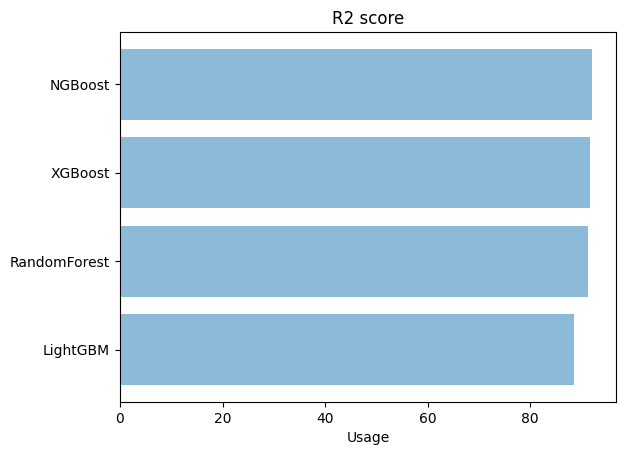

In [154]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('LightGBM', 'RandomForest',  'XGBoost', 'NGBoost')
y_pos = np.arange(len(objects))
performance = [lightgbm_r2_score,rf_r2_score, xgboost_r2_score,ngboost_r2_score]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('R2 score')

plt.show()

# NGBoost marginally outperforms better w.r.t R2_score metric